In [1]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import os
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [2]:
top_down_path = os.getcwd()
os.chdir("../Data")
data_path = os.getcwd()
os.chdir(top_down_path)

# Create dataset for regression analysis

In [3]:
# Read preprocessed
df = pd.read_csv(os.path.join(data_path, "preprocessed.csv"), index_col=0)
df.index = pd.to_datetime(df.index)

In [4]:
df

,aggregated(no_dist_heat),dist_heat,aggregated(incl_small_chp),the_combined_slp,the_combined_rlm,bdew [TWh],electricity_from_gas,gas_price [$/lhs],index,time,year,month,weekday,weekday_num,monday,friday,weekend,christmas_period,holiday,bridgeday
2021-01-01,2.146070,0.110337,2.326920,2.259861,1.721195,3.544281,0.522071,NaN,2021-01-01,0.0,2021,1,Friday,4,0,1,0,0,1,0
2021-01-02,2.120128,0.109003,2.298791,2.295591,1.816520,3.672925,0.570382,NaN,2021-01-02,1.0,2021,1,Saturday,5,0,0,1,0,0,0
2021-01-03,2.156039,0.110849,2.337728,2.328297,1.820381,3.730913,0.378169,NaN,2021-01-03,2.0,2021,1,Sunday,6,0,0,1,0,0,0
2021-01-04,2.255681,0.115972,2.445767,2.390517,2.236697,4.477985,0.686360,19.840,2021-01-04,3.0,2021,1,Monday,0,1,0,0,0,0,0
2021-01-05,2.250272,0.115694,2.439902,2.410678,2.283846,4.672453,0.749740,18.000,2021-01-05,4.0,2021,1,Tuesday,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-21,1.340926,0.068942,1.453926,1.392374,1.752227,2.692656,0.501134,96.302,2022-03-21,444.0,2022,3,Monday,0,1,0,0,0,0,0
2022-03-22,1.248650,0.064197,1.353873,1.298474,1.763850,2.834050,0.635613,98.745,2022-03-22,445.0,2022,3,Tuesday,1,0,0,0,0,0,0
2022-03-23,1.164591,0.059876,1.262731,1.192761,1.722181,2.790061,0.656999,117.000,2022-03-23,446.0,2022,3,Wednesday,2,0,0,0,0,0,0
2022-03-24,1.132335,0.058217,1.227757,1.139399,1.723889,2.802156,0.667661,111.610,2022-03-24,447.0,2022,3,Thursday,3,0,0,0,0,0,0


# Disaggregation based on fundamental assumption / energy balances

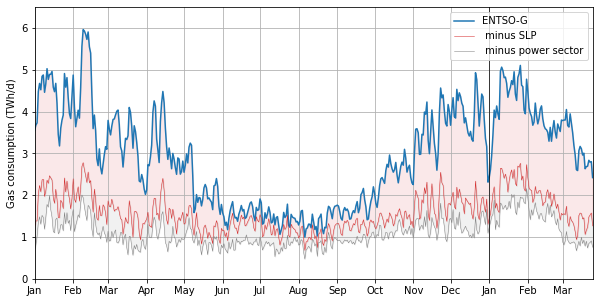

In [5]:
plt.figure(figsize=(10,5))

entso_g = df['bdew [TWh]']
entso_g.plot(label='ENTSO-G')

slp_res = entso_g - df['aggregated(incl_small_chp)']
plt.plot(df.index, slp_res, color='tab:red', label=' minus SLP', linewidth=0.5)
plt.fill_between(df.index, entso_g, slp_res, color='tab:red', alpha=0.1)

power_res = slp_res - df['electricity_from_gas']
plt.plot(df.index, power_res, color='tab:grey', label=' minus power sector', linewidth=0.5)
plt.fill_between(df.index, slp_res, power_res, color='tab:grey', alpha=0.1)

#plt.fill_between(df.index, power_res, 0, color='tab:blue', alpha=0.1)


plt.xlim('2021-01-01', '2022-03-25')
plt.ylim(0, 6.5)
plt.axvline('2022-01-01', color='black', linewidth=0.7)
plt.grid()
plt.legend(loc='upper right')
plt.ylabel('Gas consumption (TWh/d)')

X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))


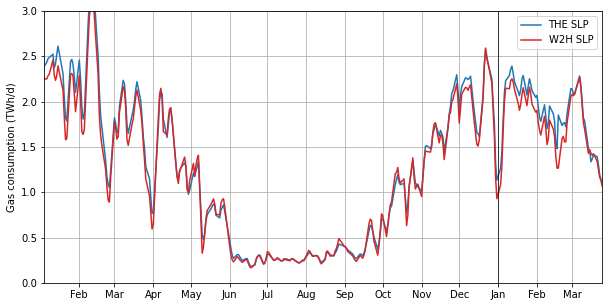

In [6]:
plt.figure(figsize=(10,5))
dft = df.dropna()
plt.plot(dft.index, dft['the_combined_slp'], label='THE SLP')
plt.plot(dft.index, dft['aggregated(no_dist_heat)'], color='tab:red', label='W2H SLP')
plt.xlim(dft.index[[0, -1]])

plt.ylim(0, 3)
plt.axvline('2022-01-01', color='black', linewidth=0.7)
plt.grid()
plt.legend(loc='upper right')
plt.ylabel('Gas consumption (TWh/d)')

X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))


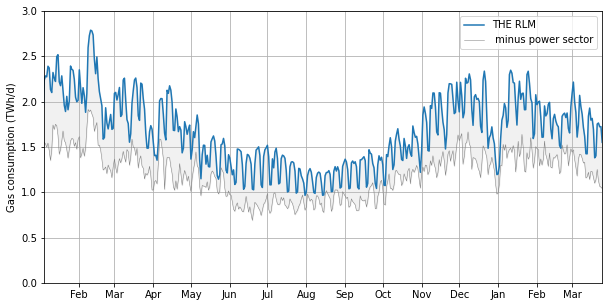

In [7]:
plt.figure(figsize=(10,5))

the_rlm = df['the_combined_rlm']
the_rlm.plot(label='THE RLM')

power_res = the_rlm - df['electricity_from_gas']
plt.plot(df.index, power_res, color='tab:grey', label=' minus power sector', linewidth=0.5)
plt.fill_between(df.index, the_rlm, power_res, color='tab:grey', alpha=0.1)

#plt.fill_between(df.index, power_res, 0, color='tab:blue', alpha=0.1)

plt.xlim(dft.index[[0, -1]])
plt.ylim(0, 3)
#plt.axvline('2022-01-01', color='black', linewidth=0.7)
plt.grid()
plt.legend(loc='upper right')
plt.ylabel('Gas consumption (TWh/d)')

X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))

# Estimations: X^= a + b*X

In [8]:
df["electricity_from_gas_sqrd"] = df["electricity_from_gas"]**2

In [9]:
df_x = df

df_x = df_x.rename(columns = {
    "aggregated(no_dist_heat)" : "slp_w2h",
    "dist_heat": "slp_w2h_dh",
    "the_combined_slp" : "slp_the",
    "the_combined_rlm" : "rlm_the",
    "bdew [TWh]" : "bdew",
    "gas_price [$/lhs]" : "prices"
})

In [10]:
df_x["the_sum"] = df_x["rlm_the"] + df_x["slp_the"]

In [11]:
df_x_no_holiday = df_x[(df_x.holiday==0) & (df_x.christmas_period==0) & (df_x.bridgeday==0)]

## Fit model to 2021 and predict for 2022

In [12]:
df_x_no_holiday_2022 = df_x_no_holiday.loc[df_x_no_holiday.index.year == 2022]

In [13]:
df_x_no_holiday_2021 = df_x_no_holiday.loc[df_x_no_holiday.index.year == 2021]

In [14]:
df_x_no_holiday.columns

Index(['slp_w2h', 'slp_w2h_dh', 'aggregated(incl_small_chp)', 'slp_the',
       'rlm_the', 'bdew', 'electricity_from_gas', 'prices', 'index', 'time',
       'year', 'month', 'weekday', 'weekday_num', 'monday', 'friday',
       'weekend', 'christmas_period', 'holiday', 'bridgeday',
       'electricity_from_gas_sqrd', 'the_sum'],
      dtype='object')

## bdew

In [15]:
model_bdew = smf.ols('bdew ~ 1 + slp_w2h + electricity_from_gas + C(weekday)', 
                            data=df_x_no_holiday)
results_bdew = model_bdew.fit() 
#results_bdew.summary()
results_bdew.rsquared

0.9546698180842963

In [16]:
#include electricity^2 as a variable 
model_bdew = smf.ols('bdew ~ 1 + slp_w2h + electricity_from_gas + electricity_from_gas_sqrd + C(weekday)', 
                            data=df_x_no_holiday)
results_bdew = model_bdew.fit() 
results_bdew.summary()
#results_bdew.rsquared

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   bdew   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     941.7
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          6.14e-264
Time:                        13:32:26   Log-Likelihood:                -13.717
No. Observations:                 412   AIC:                             47.43
Df Residuals:                     402   BIC:                             87.64
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.9314      0.095      9.834      0.000       0.745       1.118
C(weekday)[T.Monday]          0.0257      0.046      0.557      0.578      -0.065       0.116
C(weekday)[T.Saturday]       -0.1543      0.048     -3.243      0.001      -0.248      -0.061
C(weekday)[T.Sunday]         -0.1468      0.050     -2.941      0.003      -0.245      -0.049
C(weekday)[T.Thursday]        0.0398      0.047      0.838      0.402      -0.053       0.133
C(weekday)[T.Tuesday]         0.0286      0.046      0.616      0.538      -0.063       0.120
C(weekday)[T.Wednesday]       0.0420      0.047      0.894      0.372      -0.050       0.135
slp_w2h                       1.4325      0.022     64.400      0.000       1.389       1.476
electricity_from_gas          0.3676      0.376      0.978      0.329      -0.371       1.107
electricity_from_gas_sqrd     0.2219      0.348      0.637      0.524      -0.463       0.907
==============================================================================
Omnibus:                        2.443   Durbin-Watson:                   0.463
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.229
Skew:                           0.127   Prob(JB):                        0.328
Kurtosis:                       3.256   Cond. No.                         75.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

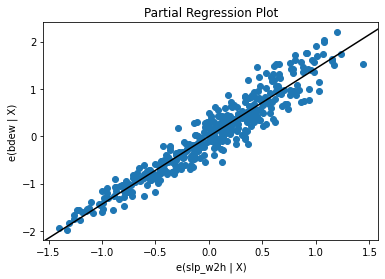

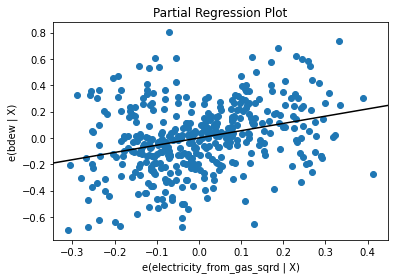

In [17]:
sm.graphics.plot_partregress("bdew", "slp_w2h", ["electricity_from_gas", "weekday"], data=df_x_no_holiday, obs_labels=False)
sm.graphics.plot_partregress("bdew", "electricity_from_gas_sqrd", ["slp_w2h", "weekday"], data=df_x_no_holiday, obs_labels=False)
plt.show()

## THE_RLM

In [18]:
model_the = smf.ols('rlm_the ~ 1 + slp_w2h + electricity_from_gas + C(weekday)', 
                            data=df_x_no_holiday)
results_the = model_the.fit() 
#results_the.summary()
results_the.rsquared

0.9727105669838748

In [19]:
model_the = smf.ols('rlm_the ~ 1 + slp_w2h + electricity_from_gas + electricity_from_gas_sqrd +  C(weekday)', 
                            data=df_x_no_holiday)
results_the = model_the.fit() 
results_the.summary()
#results_the.rsquared

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rlm_the   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1592.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          4.01e-308
Time:                        13:32:27   Log-Likelihood:                 542.66
No. Observations:                 412   AIC:                            -1065.
Df Residuals:                     402   BIC:                            -1025.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.9191      0.025     37.446      0.000       0.871       0.967
C(weekday)[T.Monday]          0.0552      0.012      4.621      0.000       0.032       0.079
C(weekday)[T.Saturday]       -0.1566      0.012    -12.698      0.000      -0.181      -0.132
C(weekday)[T.Sunday]         -0.1233      0.013     -9.531      0.000      -0.149      -0.098
C(weekday)[T.Thursday]        0.0451      0.012      3.673      0.000       0.021       0.069
C(weekday)[T.Tuesday]         0.0488      0.012      4.059      0.000       0.025       0.072
C(weekday)[T.Wednesday]       0.0514      0.012      4.217      0.000       0.027       0.075
slp_w2h                       0.3732      0.006     64.743      0.000       0.362       0.385
electricity_from_gas          0.6479      0.097      6.651      0.000       0.456       0.839
electricity_from_gas_sqrd    -0.0086      0.090     -0.096      0.924      -0.186       0.169
==============================================================================
Omnibus:                       46.915   Durbin-Watson:                   0.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.425
Skew:                          -0.394   Prob(JB):                     7.36e-42
Kurtosis:                       6.227   Cond. No.                         75.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Vizualize predictions

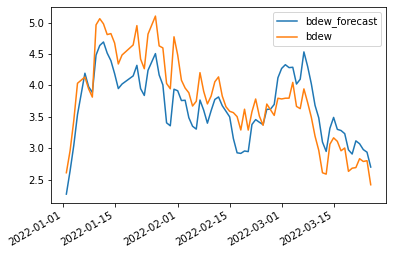

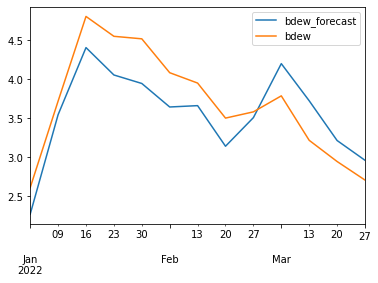

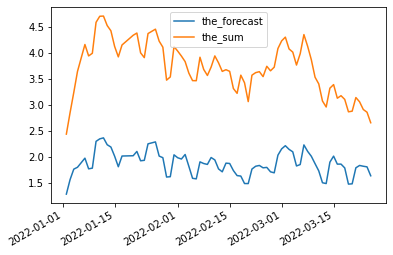

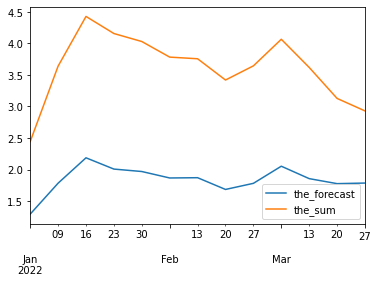

In [20]:
bdew_prediction = results_bdew.predict(df_x_no_holiday_2022)
bdew_prediction.name = "bdew_forecast"
the_prediction = results_the.predict(df_x_no_holiday_2022)
the_prediction.name = "the_forecast"

bdew_combined = pd.concat([
    bdew_prediction, df_x_no_holiday_2022["bdew"]
], axis=1)
the_combined = pd.concat([
    the_prediction, df_x_no_holiday_2022["the_sum"]
], axis=1)

bdew_combined.plot()
bdew_combined.resample("1w").mean().plot()
the_combined.plot()
the_combined.resample("1w").mean().plot()

plt.show()